In [20]:
from convokit import Corpus, download, FightingWords
import pandas as pd

In [5]:
# for now being simple and just using whole years for a given natural court
# could potentially get all case ids for the exact date range of natural courts and subset the corpora from there
rehnquist_7_full_years = [i for i in range(1995,2005)]
roberts_4_full_years = [i for i in range(2011,2016)]
cases_df = pd.read_json('../data/cases.json', lines=True)
roberts_cases = cases_df.loc[cases_df.loc[:, 'year'].isin(roberts_4_full_years)]
renquist_cases = cases_df.loc[cases_df.loc[:, 'year'].isin(rehnquist_7_full_years)]

In [6]:
# make merged dataset for rehnquist
rehnquist_corpus = None
for year in rehnquist_7_full_years:
    corp = Corpus(filename=download(f"supreme-{year}"))
    print(corp.print_summary_stats())
    if not rehnquist_corpus:
        rehnquist_corpus = corp
    else:
        rehnquist_corpus = Corpus.merge(rehnquist_corpus, corp)
print(rehnquist_corpus.print_summary_stats())

Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1995
Number of Speakers: 154
Number of Utterances: 21359
Number of Conversations: 76
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1996
Number of Speakers: 169
Number of Utterances: 21614
Number of Conversations: 81
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1997
Number of Speakers: 184
Number of Utterances: 24253
Number of Conversations: 93
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1998
Number of Speakers: 173
Number of Utterances: 21223
Number of Conversations: 79
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1999
Number of Speakers: 157
Number of Utterances: 20172
Number of Conversations: 75
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2000
Number of Speakers: 154
Number of Utterances: 18347
Number of Conversations: 78
None
Dataset already exists at /U

In [7]:
# maked merged dataset for roberts corpus
roberts_corpus = None
for year in roberts_4_full_years:
    corp = Corpus(filename=download(f"supreme-{year}"))
    print(corp.print_summary_stats())
    if not roberts_corpus:
        roberts_corpus = corp
    else:
        roberts_corpus = Corpus.merge(roberts_corpus, corp)
print(roberts_corpus.print_summary_stats())

Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2011
Number of Speakers: 127
Number of Utterances: 16388
Number of Conversations: 73
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2012
Number of Speakers: 127
Number of Utterances: 16606
Number of Conversations: 74
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2013
Number of Speakers: 118
Number of Utterances: 14556
Number of Conversations: 67
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2014
Number of Speakers: 97
Number of Utterances: 12182
Number of Conversations: 55
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2015
Number of Speakers: 127
Number of Utterances: 15986
Number of Conversations: 69
None
Number of Speakers: 395
Number of Utterances: 75718
Number of Conversations: 338
None


In [8]:
# split roberts courts into wins and losses
roberts_convo_df= roberts_corpus.get_conversations_dataframe()
roberts_wins_df = roberts_convo_df.loc[roberts_convo_df.loc[:, 'meta.win_side'] == 1, :]
roberts_losses_df = roberts_convo_df.loc[roberts_convo_df.loc[:, 'meta.win_side'] == 0, :]
roberts_convo_df.head()

,vectors,meta.case_id,meta.advocates,meta.win_side,meta.votes_side
id,,,,,
22060,[],2011_11-182,"{'paul_d_clement': {'side': 1, 'role': 'for th...",0,"{'j__john_g_roberts_jr': 0, 'j__antonin_scalia..."
22022,[],2011_11-161,"{'mark_t_stancil': {'side': 1, 'role': 'on beh...",0,"{'j__john_g_roberts_jr': 1, 'j__antonin_scalia..."
23188,[],2011_11-159,"{'eric_d_miller': {'side': 1, 'role': 'Assista...",1,"{'j__john_g_roberts_jr': 1, 'j__antonin_scalia..."
22543,[],2011_10-1320,"{'clifford_m_sloan': {'side': 1, 'role': 'for ...",0,"{'j__john_g_roberts_jr': 0, 'j__antonin_scalia..."
22258,[],2011_10-844,"{'james_f_hurst': {'side': 1, 'role': 'for the...",1,"{'j__john_g_roberts_jr': 1, 'j__antonin_scalia..."


In [9]:
# Roberts Data Analysis

In [26]:
# check that there are no incorrect case ids in the corpus and see how 
# many cases we don't have a record of in the corpus
corpus_case_ids = roberts_convo_df.loc[:, 'meta.case_id'].unique()
cases_ids = list(cases_df.loc[cases_df.loc[:, 'year'].isin(roberts_4_full_years), 'id'].unique())
num_diff = len(cases_ids)-len(corpus_case_ids) # num missing conversations 
discrepancies = [i for i in cases_ids if i not in corpus_case_ids]
corp_not_case = [i for i in corpus_case_ids if i not in cases_ids]
print(discrepancies, num_diff, corp_not_case, len(corpus_case_ids))
# all case ids in the corpus are valid case ids in the case_ids
# there are 67 missing cases that are not 

['2011_11-1179', '2011_10-1540', '2011_10-1115', '2011_11-1053', '2011_11-74', '2011_10-1521', '2011_10-1032', '2011_11-391', '2011_11-845', '2011_11-208', '2011_11-1184', '2011_11-38', '2012_12-168', '2012_12-382', '2012_12-694', '2012_11-1377', '2012_12-1084', '2012_12-1208', '2012_12-623', '2013_13-299', '2013_12-1094', '2013_13-113', '2013_13-6440', '2013_13-5967', '2013_11-1507', '2013_13-640', '2013_12-992', '2013_12-1217', '2013_13-551', '2013_13-301', '2013_13-9085', '2014_13-1421', '2014_13-1433', '2014_14-116', '2014_14-212', '2014_13-10400', '2014_14-6873', '2014_13-1412', '2014_13-896', '2014_14-95', '2014_14-593', '2014_14-400', '2014_14-275', '2014_13-7211', '2014_13-1318', '2014_126-orig', '2014_13-720', '2014_13-946', '2014_14-378', '2014_14-46', '2014_13-534', '2014_14-939', '2014_14-6381', '2014_14-618', '2015_15-278', '2015_14-10078', '2015_15-493', '2015_15-789', '2015_15-833', '2015_15-8366', '2015_14-848', '2015_14-1458', '2015_14-1143', '2015_15-648', '2015_14-10

In [18]:
# cases that are duplicated in the roberts corpus, there are only 8 cases that have 
# multiple conversation entries in the corpus, if we do anything that weights wins/losses by conversation
# then we need to take this into consideration because there will be double counting of win/loss for these case ids
unique_ids = []
dup_ids = {}
for case_id in roberts_convo_df.loc[:, 'meta.case_id']:
    if case_id in unique_ids:
        if case_id in dup_ids.keys():
            dup_ids[case_id] += 1
        else:
            dup_ids[case_id] = 1
    else:
        unique_ids.append(case_id)
dup_ids

{'2011_10-1491': 1,
 '2011_10-9646': 1,
 '2011_11-393': 3,
 '2012_10-930': 1,
 '2013_13-132': 1,
 '2014_13-7120': 1,
 '2014_14-556': 1,
 '2015_14-449': 1}

In [ ]:
# Rehnquist Data Analysis

In [13]:
rehnquist_convo_df= rehnquist_corpus.get_conversations_dataframe()
rehnquist_wins_df = rehnquist_convo_df.loc[rehnquist_convo_df.loc[:, 'meta.win_side'] == 1, :]
rehnquist_losses_df = rehnquist_convo_df.loc[rehnquist_convo_df.loc[:, 'meta.win_side'] == 0, :]

In [27]:
# check that there are no incorrect case ids in the corpus and see how 
# many cases we don't have a record of in the corpus
corpus_case_ids = rehnquist_convo_df.loc[:, 'meta.case_id'].unique()
cases_ids = list(cases_df.loc[cases_df.loc[:, 'year'].isin(rehnquist_7_full_years), 'id'].unique())
num_diff = len(cases_ids)-len(corpus_case_ids) # num missing conversations 
discrepancies = [i for i in cases_ids if i not in corpus_case_ids]
corp_not_case = [i for i in corpus_case_ids if i not in cases_ids]
print(discrepancies, num_diff, corp_not_case, len(corpus_case_ids))
# all case ids in the corpus are valid case ids in the case_ids
# there are 90 missing cases that are not 

['1995_95-6710', '1995_95-1612', '1995_95-1025', '1995_95-7186', '1995_94-9323', '1995_95-1242', '1995_95-7587', '1995_95-1691', '1995_94-8988', '1995_95-6016', '1995_35-orig', '1995_94-1419', '1996_95-1425', '1996_96-713', '1996_95-2025', '1996_96-987', '1996_96-5369', '1996_96-5831', '1996_96-8005', '1996_96-858', '1996_96-1033', '1996_96-1104', '1996_96-1383', '1996_95-2082', '1996_95-1906', '1996_96-8796', '1997_97-6749', '1997_97-8214', '1997_97-5370', '1997_97-122', '1997_97-7300', '1997_97-954', '1997_97-1217', '1997_97-663', '1998_98-437', '1998_98-1071', '1998_98-8486', '1998_127-orig', '1998_98-8952', '1998_98-6945', '1998_98-7591', '1998_98-1062', '1998_120-orig', '1998_98-7450', '1998_98-7771', '1998_98-1412', '1998_98-9085', '1998_98-83', '1999_99-295', '1999_98-9933', '1999_98-9913', '1999_99-5283', '1999_98-8770', '1999_99-5440', '1999_99-5260', '1999_99-5316', '1999_98-1111', '2000_00-262', '2000_00-866', '2000_00-121', '2000_00-1210', '2000_00-1028', '2000_00-132', '20

In [19]:
# cases that are duplicated in the rehnquist corpus, there are only 3 cases that have 
# multiple conversation entries in the corpus, if we do anything that weights wins/losses by conversation
# then we need to take this into consideration because there will be double counting of win/loss for these case ids
unique_ids = []
dup_ids = {}
for case_id in rehnquist_convo_df.loc[:, 'meta.case_id']:
    if case_id in unique_ids:
        if case_id in dup_ids.keys():
            dup_ids[case_id] += 1
        else:
            dup_ids[case_id] = 1
    else:
        unique_ids.append(case_id)
dup_ids.keys()
dup_ids

{'1999_98-6322': 1, '2000_99-1257': 1, '2003_02-1674': 1}

In [32]:
roberts_win_loss_fw = FightingWords(obj_type='conversation')
roberts_win_loss_fw.fit(roberts_corpus, class1_func = lambda convo: convo.meta['win_side'] == 1,
       class2_func = lambda convo: convo.meta['win_side'] == 0)

Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 207 valid corpus components. class2_func returned 131 valid corpus components.
Vocab size is 15000
Comparing language...
ngram zscores computed.


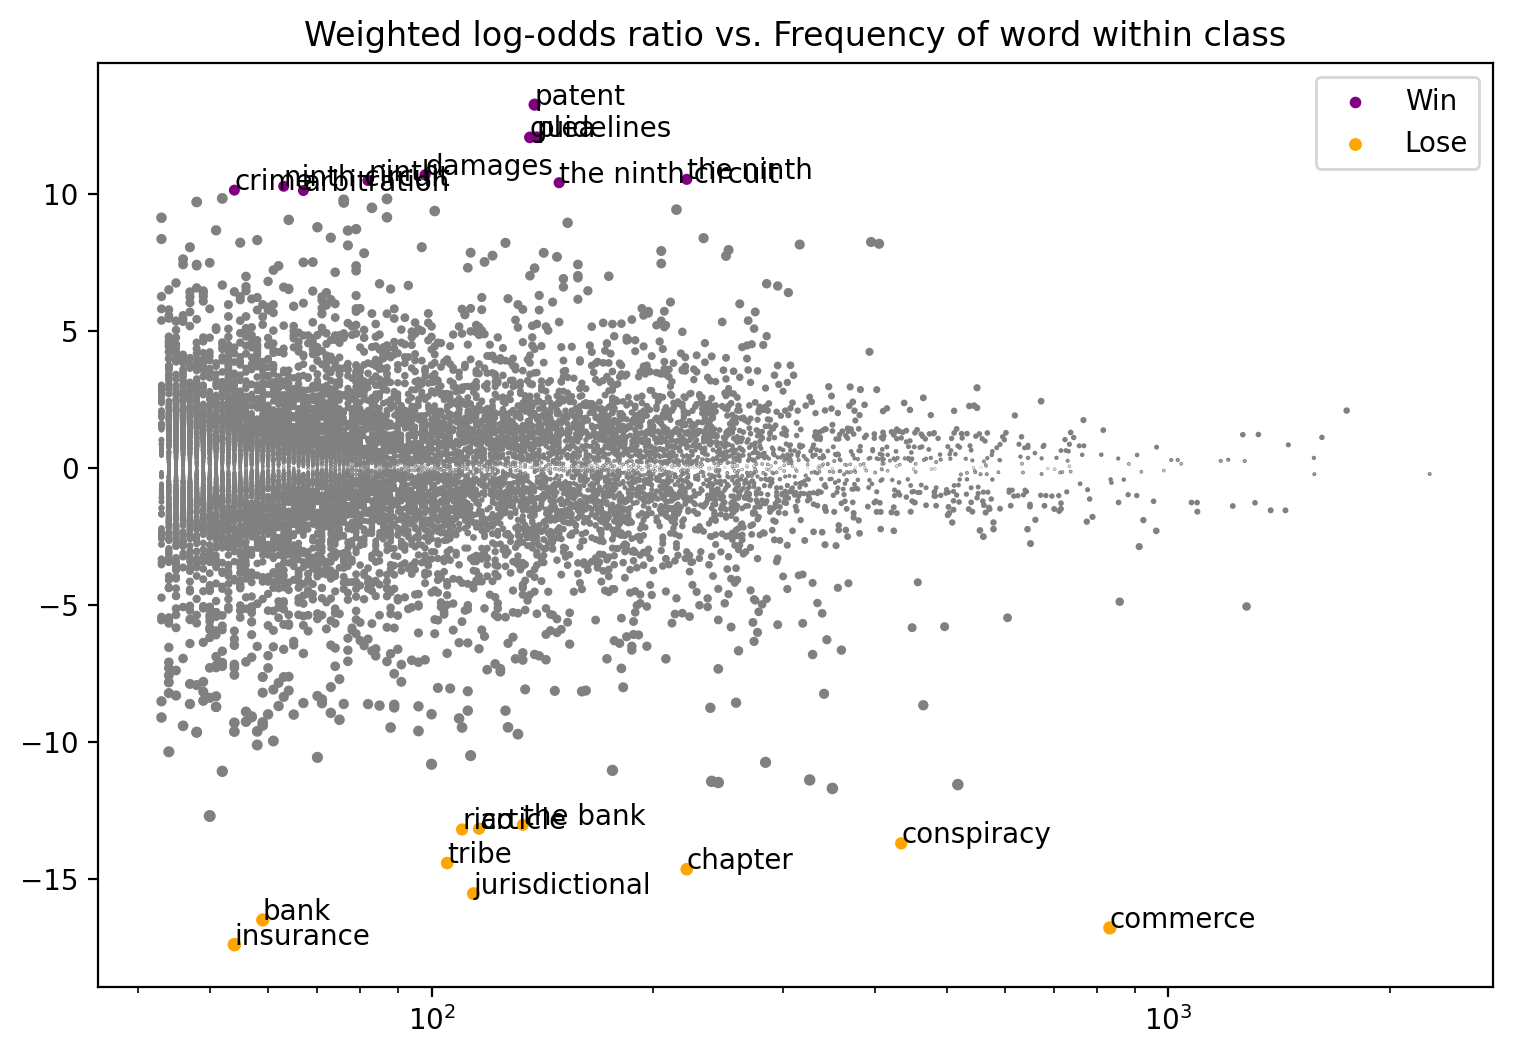

,z-score,class
ngram,,
insurance,-17.389999,Lose
commerce,-16.778952,Lose
bank,-16.491287,Lose
jurisdictional,-15.529597,Lose
chapter,-14.640042,Lose
...,...,...
the ninth,10.518452,Win
damages,10.681394,Win
guidelines,12.048674,Win


In [33]:
roberts_win_loss_fw.summarize(roberts_corpus, plot=True, class1_name='Win', class2_name='Lose')

In [34]:
# top 20 words for wins and top 20 words for losses
roberts_win_loss_fw.get_top_k_ngrams(20)

(['patent',
  'plea',
  'guidelines',
  'damages',
  'the ninth',
  'ninth',
  'the ninth circuit',
  'ninth circuit',
  'crime',
  'arbitration',
  'possession',
  'convicted',
  'attorney general',
  'fda',
  'prison',
  'infringement',
  'attorney',
  'death',
  'kansas',
  'the attorney general'],
 ['insurance',
  'commerce',
  'bank',
  'jurisdictional',
  'chapter',
  'tribe',
  'conspiracy',
  'rico',
  'article',
  'the bank',
  'standing',
  'the senate',
  'federal government',
  'fee',
  'verdict',
  'the federal government',
  'protection',
  'sale',
  'tax',
  'grand'])

In [52]:
roberts_win_loss_fw.get_ngram_zscores(class1_name='Win', class2_name='Lose')

,z-score,class
ngram,,
insurance,-17.389999,Lose
commerce,-16.778952,Lose
bank,-16.491287,Lose
jurisdictional,-15.529597,Lose
chapter,-14.640042,Lose
...,...,...
the ninth,10.518452,Win
damages,10.681394,Win
guidelines,12.048674,Win


In [ ]:
roberts_win_loss_fw.plot_fighting_words(class1_name='Win', class2_name='Lose')

In [36]:
# data analysis on rehnquist corpus
rehnquist_win_loss_fw = FightingWords(obj_type='conversation')
rehnquist_win_loss_fw.fit(rehnquist_corpus, class1_func = lambda convo: convo.meta['win_side'] == 1,
       class2_func = lambda convo: convo.meta['win_side'] == 0)

Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 495 valid corpus components. class2_func returned 289 valid corpus components.
Vocab size is 15000
Comparing language...
ngram zscores computed.


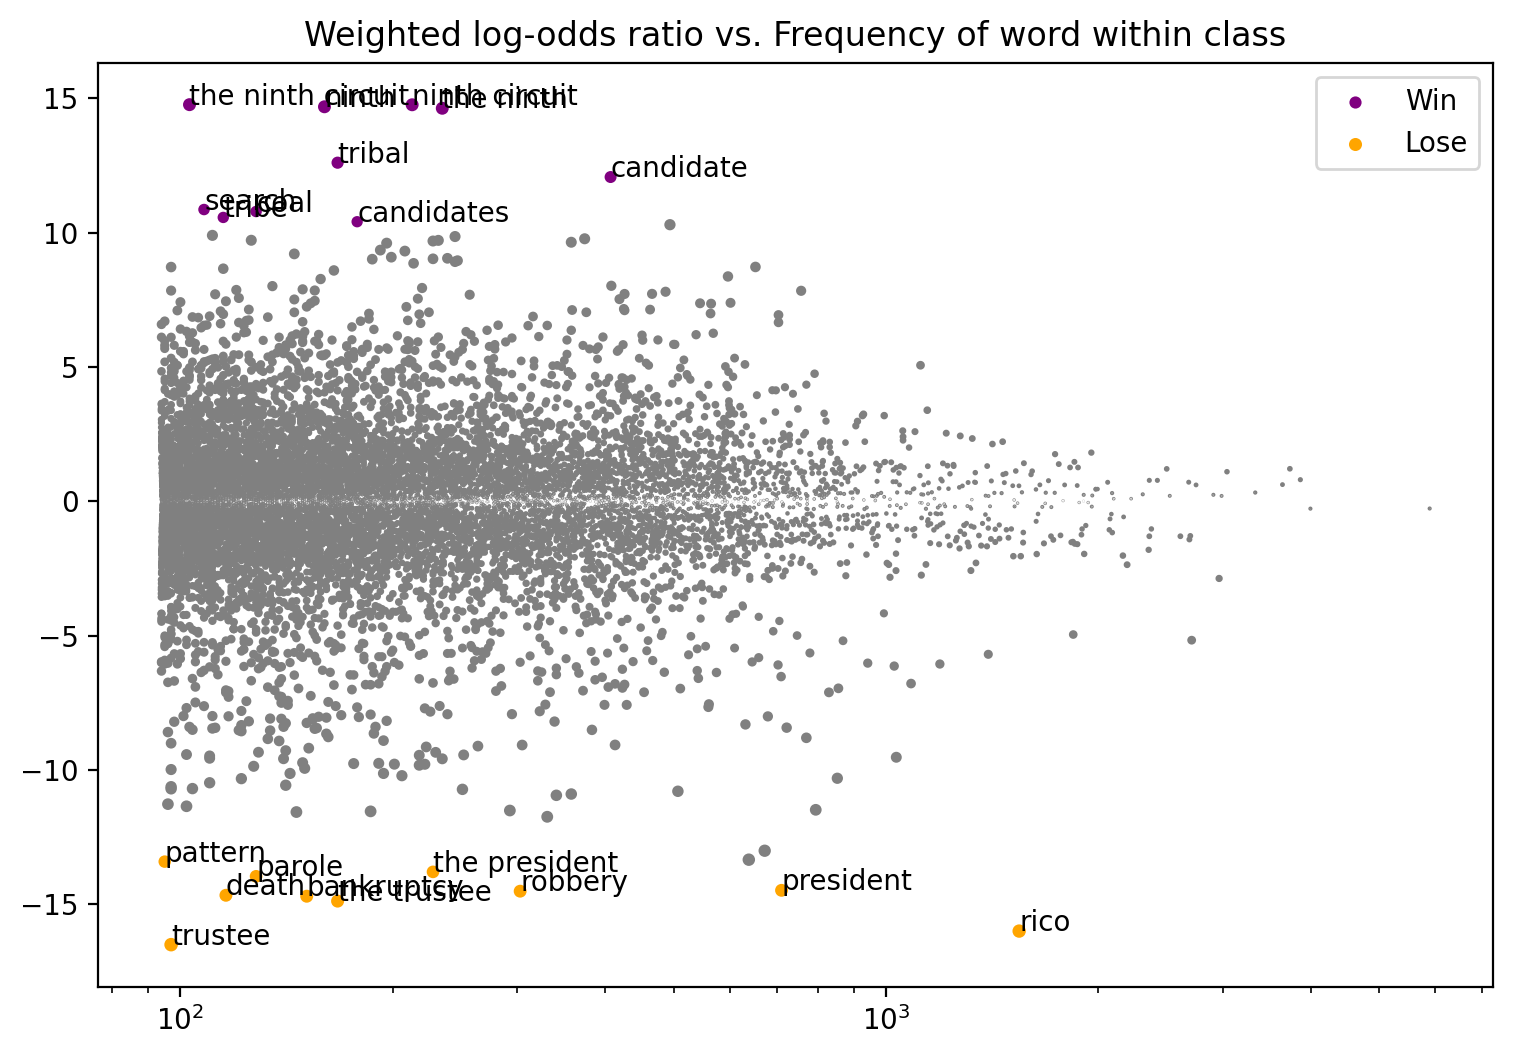

,z-score,class
ngram,,
trustee,-16.504001,Lose
rico,-15.998788,Lose
the trustee,-14.882457,Lose
bankruptcy,-14.701383,Lose
death,-14.666052,Lose
...,...,...
tribal,12.601479,Win
the ninth,14.627001,Win
ninth,14.682613,Win


In [37]:
rehnquist_win_loss_fw.summarize(rehnquist_corpus, plot=True, class1_name='Win', class2_name='Lose')

In [45]:
rehn_top_100 = rehnquist_win_loss_fw.get_top_k_ngrams(100)

In [50]:
rehn_top_100

(['the ninth circuit',
  'ninth circuit',
  'ninth',
  'the ninth',
  'tribal',
  'candidate',
  'search',
  'coal',
  'tribe',
  'candidates',
  'plea',
  'social security',
  'information',
  'contribution',
  'political',
  'contributions',
  'miranda',
  'the tribe',
  'party',
  'schools',
  'dangerousness',
  'consent',
  'price',
  'fund',
  'lease',
  'summary judgment',
  'summary',
  'privacy',
  'mark',
  'erisa',
  'mandate',
  'montana',
  'testimony',
  'tariff',
  'williams',
  'ii',
  'law enforcement',
  'respondents',
  'fourth',
  'sex',
  'the party',
  'strickland',
  'service',
  'postal',
  'witnesses',
  'jurors',
  'waiver',
  'statements',
  'tax court',
  'committee',
  'corruption',
  'the social security',
  'university',
  'flood',
  'the social',
  'funding',
  'illinois',
  'disclosure',
  'the university',
  'emergency',
  'equity',
  'california',
  'of privacy',
  'future dangerousness',
  'confusion',
  'the coal',
  'grand jury',
  'security',
  'bu

In [48]:
rehnquist_win_loss_fw.get_ngram_zscores(class1_name='Win', class2_name='Lose')

,z-score,class
ngram,,
trustee,-16.504001,Lose
rico,-15.998788,Lose
the trustee,-14.882457,Lose
bankruptcy,-14.701383,Lose
death,-14.666052,Lose
...,...,...
tribal,12.601479,Win
the ninth,14.627001,Win
ninth,14.682613,Win


In [41]:
# figuring out stopwords


In [42]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
corpus_stopwords = stopwords

In [3]:
# coming back to cases
import pandas as pd
cases_df = pd.read_json('../data/cases.json', lines=True)
cases_df.head()

,id,year,citation,title,petitioner,respondent,docket_no,court,decided_date,url,...,adv_sides_inferred,known_respondent_adv,advocates,win_side,win_side_detail,scdb_docket_id,votes,votes_detail,is_eq_divided,votes_side
0,1955_71,1955,350 US 79,Affronti v. United States,Affronti,United States,71,Warren Court,"Dec 5, 1955",https://www.oyez.org/cases/1955/71,...,True,True,"{'Harry F. Murphy': {'id': 'harry_f_murphy', '...",0.0,2.0,1955-009-01,"{'j__john_m_harlan2': 2.0, 'j__hugo_l_black': ...","{'j__john_m_harlan2': 1.0, 'j__hugo_l_black': ...",0.0,"{'j__john_m_harlan2': 0.0, 'j__hugo_l_black': ..."
1,1955_410,1955,351 US 79,"American Airlines, Inc. v. North American Airl...","American Airlines, Inc.","North American Airlines, Inc.",410,Warren Court,"Apr 23, 1956",https://www.oyez.org/cases/1955/410,...,True,True,{'Howard C. Westwood': {'id': 'howard_c_westwo...,1.0,4.0,1955-071-01,"{'j__john_m_harlan2': 2.0, 'j__hugo_l_black': ...","{'j__john_m_harlan2': 1.0, 'j__hugo_l_black': ...",0.0,"{'j__john_m_harlan2': 1.0, 'j__hugo_l_black': ..."
2,1955_351,1955,350 US 532,Archawski v. Hanioti,Archawski,Hanioti,351,Warren Court,"Apr 9, 1956",https://www.oyez.org/cases/1955/351,...,True,False,"{'Harry D. Graham': {'id': 'harry_d_graham', '...",1.0,4.0,1955-053-01,"{'j__john_m_harlan2': 2.0, 'j__hugo_l_black': ...","{'j__john_m_harlan2': 1.0, 'j__hugo_l_black': ...",0.0,"{'j__john_m_harlan2': 1.0, 'j__hugo_l_black': ..."
3,1955_38,1955,350 US 568,Armstrong v. Armstrong,Armstrong,Armstrong,38,Warren Court,"Apr 9, 1956",https://www.oyez.org/cases/1955/38,...,True,False,"{'Robert N. Gorman': {'id': 'robert_n_gorman',...",0.0,2.0,1955-056-01,"{'j__john_m_harlan2': 2.0, 'j__hugo_l_black': ...","{'j__john_m_harlan2': 1.0, 'j__hugo_l_black': ...",0.0,"{'j__john_m_harlan2': 0.0, 'j__hugo_l_black': ..."
4,1955_49,1955,350 US 198,"Bernhardt v. Polygraphic Company of America, Inc.",Bernhardt,"Polygraphic Company of America, Inc.",49,Warren Court,"Jan 16, 1956",https://www.oyez.org/cases/1955/49,...,True,False,"{'Manfred W. Ehrich, Jr.': {'id': 'manfred_w_e...",1.0,4.0,1955-020-01,"{'j__john_m_harlan2': 1.0, 'j__hugo_l_black': ...","{'j__john_m_harlan2': 2.0, 'j__hugo_l_black': ...",0.0,"{'j__john_m_harlan2': 0.0, 'j__hugo_l_black': ..."


In [35]:
# roberts natural court #4 was between August 07, 2010 - February 13, 2016
import datetime
# roberts_case_ids = []
# for row in cases_df.iterrows():
#     print(datetime.datetime(row[1]['decided_date']))
#     if row[1]['decided_date'] > 'Aug 6, 2010' and row[1]['decided_date'] < 'Feb 14, 2016':
#         roberts_case_ids.append(row[1]['id'])

cases_df.iloc[0]['decided_date'].to_date() > 'Apr 1, 1960'

AttributeError: 'str' object has no attribute 'to_date'